<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Комментарий ревьюера</b>


Привет, Сергей! Давай знакомиться! Меня зовут Дмитрий Махортов, и я буду проверять твой проект. Сразу предлагаю общение на «ты» 🙂, но если тебе это не комфортно, то дай знать, и мы перейдем на «вы». 


Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе погрузиться в увлекательный мир работы с данными и вырасти в крепкого профи. Это отдаленная цель. А ближайшая - сделать твою работу еще лучше )).
   
    
Все ключевые этапы в работе выполнены, и я вижу что с проектом ты справшяешься. Есть моменты, которые нужно доработать, но я уверен, у тебя все получится.
        
Расскажу как обычно проходит проверка:    
Бывают моменты, которые требуют пристального внимания. Комментарии по ним выделены <span style='background-color:#F7B3A4'> красным цветом </span> и обозначены значком 🛑. После их доработки проект будет принят.  🙂
 
<span style='background-color:#B7EBA7'> Зеленым цветом </span> и значком ✅ отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах. Или советы «со звездочкой», которые помогут тебе в будущем.

<span style='background-color:#F9EDA6'>Жёлтым цветом </span> и значком ⚠️ выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно).

Давай работать над проектом в диалоге: **если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом**. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения. Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>образец комментария студента</b></font>
   
Можешь использовать этот комментарий. Просто удали этот текст и вместо него напиши свой 🙂

</div>

# Прекод

# Сборный проект-4

Вам поручено разработать демонстрационную версию поиска изображений по запросу.

Для демонстрационной версии нужно обучить модель, которая получит векторное представление изображения, векторное представление текста, а на выходе выдаст число от 0 до 1 — покажет, насколько текст и картинка подходят друг другу.

## Описание данных

Данные доступны по [ссылке](https://code.s3.yandex.net/datasets/dsplus_integrated_project_4.zip).

В файле `train_dataset.csv` находится информация, необходимая для обучения: имя файла изображения, идентификатор описания и текст описания. Для одной картинки может быть доступно до 5 описаний. Идентификатор описания имеет формат `<имя файла изображения>#<порядковый номер описания>`.

В папке `train_images` содержатся изображения для тренировки модели.

В файле `CrowdAnnotations.tsv` — данные по соответствию изображения и описания, полученные с помощью краудсорсинга. Номера колонок и соответствующий тип данных:

1. Имя файла изображения.
2. Идентификатор описания.
3. Доля людей, подтвердивших, что описание соответствует изображению.
4. Количество человек, подтвердивших, что описание соответствует изображению.
5. Количество человек, подтвердивших, что описание не соответствует изображению.

В файле `ExpertAnnotations.tsv` содержатся данные по соответствию изображения и описания, полученные в результате опроса экспертов. Номера колонок и соответствующий тип данных:

1. Имя файла изображения.
2. Идентификатор описания.

3, 4, 5 — оценки трёх экспертов.

Эксперты ставят оценки по шкале от 1 до 4, где 1 — изображение и запрос совершенно не соответствуют друг другу, 2 — запрос содержит элементы описания изображения, но в целом запрос тексту не соответствует, 3 — запрос и текст соответствуют с точностью до некоторых деталей, 4 — запрос и текст соответствуют полностью.

В файле `test_queries.csv` находится информация, необходимая для тестирования: идентификатор запроса, текст запроса и релевантное изображение. Для одной картинки может быть доступно до 5 описаний. Идентификатор описания имеет формат `<имя файла изображения>#<порядковый номер описания>`.

В папке `test_images` содержатся изображения для тестирования модели.

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Да, это хорошая практика - дать описание контекста и проблемы, которую мы решаем. </div>

## Исследовательский анализ данных

Наш датасет содержит экспертные и краудсорсинговые оценки соответствия текста и изображения.

В файле с экспертными мнениями для каждой пары изображение-текст имеются оценки от трёх специалистов. Для решения задачи вы должны эти оценки агрегировать — превратить в одну. Существует несколько способов агрегации оценок, самый простой — голосование большинства: за какую оценку проголосовала большая часть экспертов (в нашем случае 2 или 3), та оценка и ставится как итоговая. Поскольку число экспертов меньше числа классов, может случиться, что каждый эксперт поставит разные оценки, например: 1, 4, 2. В таком случае данную пару изображение-текст можно исключить из датасета.

Вы можете воспользоваться другим методом агрегации оценок или придумать свой.

В файле с краудсорсинговыми оценками информация расположена в таком порядке:

1. Доля исполнителей, подтвердивших, что текст **соответствует** картинке.
2. Количество исполнителей, подтвердивших, что текст **соответствует** картинке.
3. Количество исполнителей, подтвердивших, что текст **не соответствует** картинке.

После анализа экспертных и краудсорсинговых оценок выберите либо одну из них, либо объедините их в одну по какому-то критерию: например, оценка эксперта принимается с коэффициентом 0.6, а крауда — с коэффициентом 0.4.

Ваша модель должна возвращать на выходе вероятность соответствия изображения тексту, поэтому целевая переменная должна иметь значения от 0 до 1.


In [1]:
!pip install "protobuf<=3.20.3"

ERROR: Could not find a version that satisfies the requirement protobuf<=3.20.3 (from versions: none)
ERROR: No matching distribution found for protobuf<=3.20.3


In [2]:
import torchvision.models as models
import torch
import torch.nn as nn
from torchvision import transforms
from torchvision import models
import numpy as np
import pandas as pd
import random as rd
import torch
import torch.nn as nn
from math import ceil
from PIL import Image
import os
import spacy
import re
import matplotlib.pyplot as plt
import os
from pathlib import Path
import time
from random import randrange

import nltk
from nltk.corpus import stopwords as nltk_stopwords

from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.model_selection import GroupShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

from tensorflow import keras
from tensorflow.keras.layers import Dense 
from tensorflow.keras.models import Sequential

2025-11-29 19:20:31.680366: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1764444031.972927      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1764444032.058151      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично, все нужные библиотеки импортированы в начале ноутбука.Это хорошая практика.</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Эти варнинги похоже связаны с какой-то внутренней ошибкой Kaggle.
    
Скопирую комментарий, который я уже писал студентке твоего потока, ей похоже помогло
    
--------------------
    
**Техническая заметка (Ошибка окружения):**
Вижу в логах ошибку `AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'`.
Скорее всего это проблема несовместимости версий библиотек **TensorFlow** и **Protobuf** в средах Kaggle/Colab. TensorFlow ищет старый метод, который удалили в новых версиях `protobuf`.
**Лечение:** Если столкнешься с этим снова, попробуй добавить в начало ноутбука команду принудительной установки совместимой версии:
`!pip install "protobuf<=3.20.3"` (и перезапусти ядро).
    
        

</div>

In [3]:
def first_check(df, dataset_name=''):
    # Печатаем название датасета (если их несколько)
    if dataset_name:
        print(f'Анализ датасета: {dataset_name}')
    else:
        print('Анализ датасета')
    print("=" * 40 + "\n")

    print('Первые 5 строк:')
    display(df.head())
    print('\nПоледние 5 строк:')
    display(df.tail())
    print('\nРазмерность датасета:')
    print(df.shape)

    print('\nИнформаци о данных')
    print(df.info())

    print('\nОписательная статистика:')
    display(df.describe(include='all'))

    print('\nНаличие пропусков и дублей:')
    display(df.duplicated().sum())

In [4]:
path = '/kaggle/input'

# Загрузка train_dataset
train_dataset = pd.read_csv(os.path.join(path, 'dfffff/train_dataset.csv'))
train_dataset.columns = ['file_name', 'query_id', 'query_text']

# Загрузка CrowdAnnotations
CrowdAnnotations = pd.read_table(
    os.path.join(path, 'dfffff/CrowdAnnotations.tsv'),
    names=['file_name', 'query_id', 'target_crowd', 'num_votes_up', 'num_votes_down']
)

# Загрузка ExpertAnnotations
ExpertAnnotations = pd.read_table(
    os.path.join(path, 'dfffff/ExpertAnnotations.tsv'),
    names=['file_name', 'query_id', 'eval_1', 'eval_2', 'eval_3']
)

# Загрузка test_queries - FIXED
test_queries = pd.read_csv(
    os.path.join(path, 'dfffff/test_queries.csv'), 
    sep='|'
)
test_queries.columns = ['index', 'query_id', 'query_text', 'file_name']

# Загрузка test_images
test_images = pd.read_csv(os.path.join(path, 'dfffff/test_images.csv'))
test_images.columns = ['file_name']

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">

Обрати внимание на стиль именования переменных `CrowdAnnotations` и `ExpertAnnotations`.
В Python существует официальный стандарт стиля кода — **PEP8**. Согласно ему:
* С большой буквы (`CamelCase`) принято называть **классы**.
* Переменные и функции нужно называть строчными буквами с разделением слов нижним подчеркиванием (`snake_case`).

Использование `CamelCase` для обычных переменных (датафреймов) может ввести коллегу в заблуждение — он подумает, что это класс.
**Рекомендую переименовать:** `crowd_annotations`, `expert_annotations`.
</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
    
Думаю стоит загрузить и познакомиться со всеми датафреймами сразу.  Про датафрейм с тестовыми изображениями ты вспоминаешь только в самом конце, на этапе тестирования</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Очень "больная тема" - это загрузка данных и использование путей.Очевидно, что на моей машине (и скорее всего машине любого другого пользователя) пути к данным будут другие. И это "рабочая ситуация для большинства проектов. Решается она следующим образом:
 
    
  - Путь к директории с данными  должен быть задан в константе, в самом начале работы. Тогда ревьюеру (или любому другому пользователю твоего ноутбука, даже тебе самому, если нужно будет провести презентацию руководителю на другом компьютере) нужно будет изменить только этот путь.
  - Все остальные пути внутри ноутбука должны быть созданы с исопользованием этой константы, а не заданы жестко (есть сленговое определение "хардкод").  Более  того, настоятельно рекомендую для создания сложных путей вместо простой конкатерации строк с исползованием '/' использовать os.path.join(), тогда код будет одинаково надежно работать и в среде Windows и Linux (MacOS).
   
Чтобы запустить твой код при проверке я был вынужден руками менять код по всему ноутбуку. Прошу тебя внести изменения так, чтобы путь к данным нужно было изменять всего один раз.


А вот это образец универсального кода для загрузки данных    
    
    DATA_PATH = твой путь    
    
    df_train = pd.read_csv(os.path.join(DATA_PATH, 'train_dataset.csv'))
    ....
    
    
---------------
    
И пожалуйста исключи повторное объявление констант вида `path2 = '/kaggle/input/dfffff/test_images/'`.  Все константы с путями должны собираться от базового пути к данным.   
    
---------------
    
И убедись что хардкод путей отсутствует везде, в том числе на этапе тестирования    
    
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b> Комментарий студента</b></font>
   
 Поправил
   
</div>

In [5]:
first_check(train_dataset)

Анализ датасета

Первые 5 строк:


file_name                     query_id  \
0  1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2   
1  1262583859_653f1469a9.jpg  2549968784_39bfbe44f9.jpg#2   
2  2447284966_d6bbdb4b6e.jpg  2549968784_39bfbe44f9.jpg#2   
3  2549968784_39bfbe44f9.jpg  2549968784_39bfbe44f9.jpg#2   
4  2621415349_ef1a7e73be.jpg  2549968784_39bfbe44f9.jpg#2   

                                          query_text  
0  A young child is wearing blue goggles and sitt...  
1  A young child is wearing blue goggles and sitt...  
2  A young child is wearing blue goggles and sitt...  
3  A young child is wearing blue goggles and sitt...  
4  A young child is wearing blue goggles and sitt...


Поледние 5 строк:


file_name                     query_id  \
5817  757046028_ff5999f91b.jpg  2061144717_5b3a1864f0.jpg#2   
5818  799486353_f665d7b0f0.jpg  2196107384_361d73a170.jpg#2   
5819  909808296_23c427022d.jpg  2112921744_92bf706805.jpg#2   
5820  929679367_ff8c7df2ee.jpg  3651971126_309e6a5e22.jpg#2   
5821  968081289_cdba83ce2e.jpg  2292406847_f366350600.jpg#2   

                                        query_text  
5817    A man in an ampitheater talking to a boy .  
5818     a old man walks down the uncrowded road .  
5819  A dog stands on the side of a grassy cliff .  
5820                  A blurry photo of two dogs .  
5821                   A man rows his boat below .


Размерность датасета:
(5822, 3)

Информаци о данных
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   file_name   5822 non-null   object
 1   query_id    5822 non-null   object
 2   query_text  5822 non-null   object
dtypes: object(3)
memory usage: 136.6+ KB
None

Описательная статистика:


file_name                     query_id  \
count                        5822                         5822   
unique                       1000                          977   
top     3364151356_eecd07a23e.jpg  2600867924_cd502fc911.jpg#2   
freq                           10                           34   

                                               query_text  
count                                                5822  
unique                                                977  
top     Two dogs , one brown and white and one black a...  
freq                                                   34


Наличие пропусков и дублей:


0

Пропусков и явных дубликатов нет.

Переведем текст запросов в леммы

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">



Сергей, здесь ты немного поторопился.
Ты посмотрел  только на один датафрейм (`train_dataset`) и сразу приступил к его тяжелой обработке (лемматизации). При этом остальные файлы (`CrowdAnnotations`, `ExpertAnnotations`, тестовые данные) загружены, но ты даже не убедился что они корректно прочитались.

**Почему так делать не стоит:**
1.  **Нарушение логики:** Ты начинаешь изменять данные, еще не составив полного представления о них. В Data Science важен этап **Data Understanding**: сначала мы загружаем **все** источники, смотрим на их размеры, типы данных, пропуски, проверяем, как они стыкуются между собой по ID. И только получив эту "объемную картинку", планируем стратегию предобработки.
2.  **Читаемость и поддержка:** Структурированный код (Загрузка -> EDA -> Предобработка -> Моделирование) понятен и тебе, и коллегам. Если размазывать препроцессинг по ноутбуку, в коде будет очень легко запутаться.

**Рекомендация:**
Сначала загрузи и изучи все имеющиеся файлы, проведи полноценный исследовательский анализ (распределения, пересечения данных), и только потом переходи к разделу "Предобработка", где ты системно очистишь и лемматизируешь тексты.
    

------------------
    
Да, лемматизация нужна, т.к. ты используешь TF-IDF. Но если бы ты использовал трансформеры для векторизации текстов, то она бы не пригодилась. Поэтому разумнее сделать её ближе к соответствующему разделу, как часть векторизации.     
   
    
</div>

In [6]:
df = pd.DataFrame(train_dataset['file_name']).drop_duplicates('file_name').reset_index(drop=True)

In [7]:
df_query = train_dataset[['query_id', 'query_text']].drop_duplicates().reset_index(drop=True)

In [8]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])


In [9]:
def lemmatize_text(df):
    df['lem_query_text'] = df['query_text'].apply(lambda text: " ".join([token.lemma_ for token in nlp(text)]))    
    return df

In [10]:
df_query = lemmatize_text(df_query)

In [11]:
first_check(CrowdAnnotations)

Анализ датасета

Первые 5 строк:


file_name                     query_id  target_crowd  \
0  1056338697_4f7d7ce270.jpg  1056338697_4f7d7ce270.jpg#2           1.0   
1  1056338697_4f7d7ce270.jpg   114051287_dd85625a04.jpg#2           0.0   
2  1056338697_4f7d7ce270.jpg  1427391496_ea512cbe7f.jpg#2           0.0   
3  1056338697_4f7d7ce270.jpg  2073964624_52da3a0fc4.jpg#2           0.0   
4  1056338697_4f7d7ce270.jpg  2083434441_a93bc6306b.jpg#2           0.0   

   num_votes_up  num_votes_down  
0             3               0  
1             0               3  
2             0               3  
3             0               3  
4             0               3


Поледние 5 строк:


file_name                    query_id  target_crowd  \
47825  997722733_0cb5439472.jpg  543007912_23fc735b99.jpg#2      0.000000   
47826  997722733_0cb5439472.jpg  544576742_283b65fa0d.jpg#2      0.333333   
47827  997722733_0cb5439472.jpg  872622575_ba1d3632cc.jpg#2      1.000000   
47828  997722733_0cb5439472.jpg  888425986_e4b6c12324.jpg#2      0.000000   
47829  997722733_0cb5439472.jpg  997722733_0cb5439472.jpg#2      0.666667   

       num_votes_up  num_votes_down  
47825             0               3  
47826             1               2  
47827             3               0  
47828             0               3  
47829             2               1


Размерность датасета:
(47830, 5)

Информаци о данных
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47830 entries, 0 to 47829
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   file_name       47830 non-null  object 
 1   query_id        47830 non-null  object 
 2   target_crowd    47830 non-null  float64
 3   num_votes_up    47830 non-null  int64  
 4   num_votes_down  47830 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.8+ MB
None

Описательная статистика:


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


file_name                    query_id  target_crowd  \
count                       47830                       47830  47830.000000   
unique                       1000                        1000           NaN   
top     1572532018_64c030c974.jpg  249394748_2e4acfbbb5.jpg#2           NaN   
freq                          120                         169           NaN   
mean                          NaN                         NaN      0.068786   
std                           NaN                         NaN      0.207532   
min                           NaN                         NaN      0.000000   
25%                           NaN                         NaN      0.000000   
50%                           NaN                         NaN      0.000000   
75%                           NaN                         NaN      0.000000   
max                           NaN                         NaN      1.000000   

        num_votes_up  num_votes_down  
count   47830.000000    47830.000000  
unique           NaN             NaN  
top              NaN             NaN  
freq             NaN             NaN  
mean        0.208488        2.820155  
std         0.628898        0.656676  
min         0.000000        0.000000  
25%         0.000000        3.000000  
50%         0.000000        3.000000  
75%         0.000000        3.000000  
max         5.000000        6.000000


Наличие пропусков и дублей:


0

Пропусков и явных дубликатов нет.

In [12]:
first_check(ExpertAnnotations)

Анализ датасета

Первые 5 строк:


file_name                     query_id  eval_1  eval_2  \
0  1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2       1       1   
1  1056338697_4f7d7ce270.jpg  2718495608_d8533e3ac5.jpg#2       1       1   
2  1056338697_4f7d7ce270.jpg  3181701312_70a379ab6e.jpg#2       1       1   
3  1056338697_4f7d7ce270.jpg  3207358897_bfa61fa3c6.jpg#2       1       2   
4  1056338697_4f7d7ce270.jpg  3286822339_5535af6b93.jpg#2       1       1   

   eval_3  
0       1  
1       2  
2       2  
3       2  
4       2


Поледние 5 строк:


file_name                     query_id  eval_1  eval_2  \
5817  997722733_0cb5439472.jpg  2981702521_2459f2c1c4.jpg#2       1       1   
5818  997722733_0cb5439472.jpg  2985679744_75a7102aab.jpg#2       1       1   
5819  997722733_0cb5439472.jpg  3150742439_b8a352e1e0.jpg#2       1       1   
5820  997722733_0cb5439472.jpg  3375070563_3c290a7991.jpg#2       1       1   
5821  997722733_0cb5439472.jpg   486917990_72bd4069af.jpg#2       3       3   

      eval_3  
5817       1  
5818       1  
5819       2  
5820       1  
5821       3


Размерность датасета:
(5822, 5)

Информаци о данных
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  5822 non-null   object
 1   query_id   5822 non-null   object
 2   eval_1     5822 non-null   int64 
 3   eval_2     5822 non-null   int64 
 4   eval_3     5822 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 227.6+ KB
None

Описательная статистика:


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


file_name                     query_id       eval_1  \
count                        5822                         5822  5822.000000   
unique                       1000                          977          NaN   
top     3107513635_fe8a21f148.jpg  2600867924_cd502fc911.jpg#2          NaN   
freq                           10                           34          NaN   
mean                          NaN                          NaN     1.436620   
std                           NaN                          NaN     0.787084   
min                           NaN                          NaN     1.000000   
25%                           NaN                          NaN     1.000000   
50%                           NaN                          NaN     1.000000   
75%                           NaN                          NaN     2.000000   
max                           NaN                          NaN     4.000000   

             eval_2       eval_3  
count   5822.000000  5822.000000  
unique          NaN          NaN  
top             NaN          NaN  
freq            NaN          NaN  
mean       1.624356     1.881999  
std        0.856222     0.904087  
min        1.000000     1.000000  
25%        1.000000     1.000000  
50%        1.000000     2.000000  
75%        2.000000     2.000000  
max        4.000000     4.000000


Наличие пропусков и дублей:


0

Удалим строки, где мнение у экспертов отлично друг от друга

In [13]:
ExpertAnnotations.loc[(ExpertAnnotations['eval_1'] != ExpertAnnotations['eval_2']) &
                        (ExpertAnnotations['eval_2'] != ExpertAnnotations['eval_3']) &
                        (ExpertAnnotations['eval_3'] != ExpertAnnotations['eval_1']), 'file_name'].count()

126

In [14]:
ExpertAnnotations = ExpertAnnotations.drop(
    ExpertAnnotations[(ExpertAnnotations['eval_1'] != ExpertAnnotations['eval_2']) &
                        (ExpertAnnotations['eval_2'] != ExpertAnnotations['eval_3']) &
                        (ExpertAnnotations['eval_3'] != ExpertAnnotations['eval_1'])].index
)

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">

Ты опять смешиваешь знакомство и предобработку данных.. В реальном проекте это приведет к путаннице.
</div>

In [15]:
def most_votes(df):
    cols = ['eval_1', 'eval_2', 'eval_3']
    
    df['majority_vote'] = df[cols].mode(axis=1)[0]
    
    df['target_experts'] = ((df['majority_vote'] - 1) / 3).round(4)
    
    df.drop('majority_vote', axis=1, inplace=True)
    
    return df

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
    
В функции `most_votes` допущена серьезная логическая ошибка при выборе итоговой экспертной оценки.

Посмотри на эту строку:

```python
df.loc[df['target_experts'] == 0, 'target_experts'] = ((df['eval_2'] - 1) / 3).round(4)
```

Ты предполагаешь, что если нет полного единогласия, то верная оценка (оценка большинства) **всегда** находится в колонке `eval_2`. Но это не так. Оценки экспертов не отсортированы.
**Пример ошибки:**
Представь, что оценки распределились так: `[4, 1, 4]` (Эксперт 1 и 3 согласны, Эксперт 2 — нет).

  * Большинство голосовало за **4**.
  * Твой код возьмет `eval_2`, то есть **1**.
  * В итоге вместо высокого соответствия модель будет учиться на низком.

**Как исправить:**
Тебе нужно честно посчитать **моду** (самое частое значение) для каждой строки.
Самый простой способ — использовать метод `mode` из pandas:

```python
# axis=1 означает, что считаем моду по строкам
cols = ['eval_1', 'eval_2', 'eval_3']
df['majority_vote'] = df[cols].mode(axis=1)[0]
df['target_experts'] = (df['majority_vote'] - 1) /3    
```    
    
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b> Комментарий студента</b></font>
   
 Поправил
   
</div>

In [16]:
ExpertAnnotations = most_votes(ExpertAnnotations)

In [17]:
ExpertAnnotations.head()

file_name                     query_id  eval_1  eval_2  \
0  1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2       1       1   
1  1056338697_4f7d7ce270.jpg  2718495608_d8533e3ac5.jpg#2       1       1   
2  1056338697_4f7d7ce270.jpg  3181701312_70a379ab6e.jpg#2       1       1   
3  1056338697_4f7d7ce270.jpg  3207358897_bfa61fa3c6.jpg#2       1       2   
4  1056338697_4f7d7ce270.jpg  3286822339_5535af6b93.jpg#2       1       1   

   eval_3  target_experts  
0       1          0.0000  
1       2          0.0000  
2       2          0.0000  
3       2          0.3333  
4       2          0.0000

In [18]:
ExpertAnnotations.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5696 entries, 0 to 5821
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   file_name       5696 non-null   object 
 1   query_id        5696 non-null   object 
 2   eval_1          5696 non-null   int64  
 3   eval_2          5696 non-null   int64  
 4   eval_3          5696 non-null   int64  
 5   target_experts  5696 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 311.5+ KB


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
    
И если ты уж  решился на такие серьезные изменения в датафрейме, пожалуйста проверь результат (проверь сам и покажи читателю). Минимум это head + info    
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b> Комментарий студента</b></font>
   
 Поправил
   
</div>

In [19]:
first_check(test_queries)

Анализ датасета

Первые 5 строк:


index                     query_id  \
0      0  1177994172_10d143cb8d.jpg#0   
1      1  1177994172_10d143cb8d.jpg#1   
2      2  1177994172_10d143cb8d.jpg#2   
3      3  1177994172_10d143cb8d.jpg#3   
4      4  1177994172_10d143cb8d.jpg#4   

                                          query_text  \
0  Two blonde boys , one in a camouflage shirt an...   
1  Two boys are squirting water guns at each other .   
2            Two boys spraying each other with water   
3  Two children wearing jeans squirt water at eac...   
4  Two young boys are squirting water at each oth...   

                   file_name  
0  1177994172_10d143cb8d.jpg  
1  1177994172_10d143cb8d.jpg  
2  1177994172_10d143cb8d.jpg  
3  1177994172_10d143cb8d.jpg  
4  1177994172_10d143cb8d.jpg


Поледние 5 строк:


index                    query_id  \
495    495  989851184_9ef368e520.jpg#0   
496    496  989851184_9ef368e520.jpg#1   
497    497  989851184_9ef368e520.jpg#2   
498    498  989851184_9ef368e520.jpg#3   
499    499  989851184_9ef368e520.jpg#4   

                                            query_text  \
495          A black dog has a dumbbell in his mouth .   
496  A black dog has a dumbbell in his mouth lookin...   
497  A black dog holding a weight in its mouth stan...   
498  A black dog holds a small white dumbbell in it...   
499  The black dog has a toy in its mouth and a per...   

                    file_name  
495  989851184_9ef368e520.jpg  
496  989851184_9ef368e520.jpg  
497  989851184_9ef368e520.jpg  
498  989851184_9ef368e520.jpg  
499  989851184_9ef368e520.jpg


Размерность датасета:
(500, 4)

Информаци о данных
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       500 non-null    int64 
 1   query_id    500 non-null    object
 2   query_text  500 non-null    object
 3   file_name   500 non-null    object
dtypes: int64(1), object(3)
memory usage: 15.8+ KB
None

Описательная статистика:


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


index                     query_id  \
count   500.000000                          500   
unique         NaN                          500   
top            NaN  1177994172_10d143cb8d.jpg#0   
freq           NaN                            1   
mean    249.500000                          NaN   
std     144.481833                          NaN   
min       0.000000                          NaN   
25%     124.750000                          NaN   
50%     249.500000                          NaN   
75%     374.250000                          NaN   
max     499.000000                          NaN   

                                               query_text  \
count                                                 500   
unique                                                500   
top     Two blonde boys , one in a camouflage shirt an...   
freq                                                    1   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                        file_name  
count                         500  
unique                        100  
top     1177994172_10d143cb8d.jpg  
freq                            5  
mean                          NaN  
std                           NaN  
min                           NaN  
25%                           NaN  
50%                           NaN  
75%                           NaN  
max                           NaN


Наличие пропусков и дублей:


0

Пропусков и явных дубликатов нет.

In [20]:
diff = []
for query_id in CrowdAnnotations['query_id'].unique():
    if query_id not in train_dataset['query_id'].unique():
        diff.append(query_id)

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">

Ты используешь цикл `for` для поиска различий между списками `query_id`.

```python
diff = []
for query_id in CrowdAnnotations['query_id'].unique():
    if query_id not in train_dataset['query_id'].unique():
        diff.append(query_id)
```

**Почему так делать не стоит:**

1.  Это **медленно**. Ты перебираешь элементы в цикле Python.
2.  Это **излишне**. В Python есть встроенный тип данных `set` (множество), который умеет находить разницу мгновенно.

**Как писать по-взрослому:**

```python
# set(A) - set(B) вернет элементы, которые есть в A, но нет в B
diff = set(CrowdAnnotations['query_id']) - set(train_dataset['query_id'])
```

Это работает в сотни раз быстрее и занимает одну строчку.
К тому же, обрати внимание: ты вычислил переменную `diff`, но нигде её дальше не использовал. Если это был просто анализ — лучше выводить результат на экран, а если не нужно — удалять лишний код.
</div>

In [21]:
#Объединим таблицу с оценками
train_data = CrowdAnnotations.merge(ExpertAnnotations,
                                      how='outer', 
                                      on=['file_name', 'query_id']).drop(['eval_1', 
                                                                          'eval_2', 
                                                                          'eval_3',
                                                                          'num_votes_up',
                                                                          'num_votes_down'], axis=1)

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">

По объединению экспертных и крауд оценок все ОК, но подсвечу возможные альтернативы
    
--------------    
    
    
В этом проекте есть несколько возможных стратегий работы с обучающими и краудсорс оценками,  вот эти стратегии с плюсами и минусами:
   

   - использовать соединение через outer, в этом случае, при корректной обработке пропусков мы можем получить более 50К размеченых пар. К плюсам данного подхода можно отнести большое количество данных. Минус - в основном это будут данные, размеченные краудсорсерами, а там качество раметки ниже.
   - использовать только экспертные оценки. плюс - высокое качество данных (разметка имеет шкалу). Минус - данных меньше.  Поясню по поводу качества разметки на примере: если на изображении одна собака, а в описании "две собаки бегут по берегу", то эксперты поставять соответствие 0,6-0,7 (переводя в шкалу 0-1), а краудсорсеры поставят 0.  Но на экспертных оценках модель хотя-бы научится находить собак, а на краудсор оценках ничему не начится.

   - использование соединения через left.  Данный подход очевидно проигрывает второму варианту: данных столько же, нужно дополнительно возиться с объединением, но качество разметки снижается.. Но это соответсвует предложениям авторов проекта, поэтому такой подход имеет право на жизнь

   - объединение через inner. Тут все плохо - и данных ОЧЕНЬ мало (в два раза меньше, чем использовать только экспертные оценки) и качество у них "подпорчено". И навыков по обработке пропусков не получаем.....


</div>

In [22]:
train_data.isna().sum()


file_name             0
query_id              0
target_crowd       3438
target_experts    45572
dtype: int64

In [23]:
#Объединим таблицу с оценками и таблицу с запросами
train_data = train_data.merge(df_query, 
                              how='inner', 
                              on=['query_id'])

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 да, действительно, это самый простой и быстрый способ востановить текстовые описания
</div>

In [24]:
first_check(train_data)

Анализ датасета

Первые 5 строк:


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


file_name                     query_id  target_crowd  \
0  1056338697_4f7d7ce270.jpg  1056338697_4f7d7ce270.jpg#2           1.0   
1  1056338697_4f7d7ce270.jpg   114051287_dd85625a04.jpg#2           0.0   
2  1056338697_4f7d7ce270.jpg  1427391496_ea512cbe7f.jpg#2           0.0   
3  1056338697_4f7d7ce270.jpg  2073964624_52da3a0fc4.jpg#2           0.0   
4  1056338697_4f7d7ce270.jpg  2083434441_a93bc6306b.jpg#2           0.0   

   target_experts                                         query_text  \
0             NaN  A woman is signaling is to traffic , as seen f...   
1             NaN          A boy in glasses is wearing a red shirt .   
2             NaN   A young boy holds onto a blue handle on a pier .   
3             NaN  A woman wearing black clothes , a purple scarf...   
4             NaN  An older woman with blond hair rides a bicycle...   

                                      lem_query_text  
0  a woman be signal be to traffic , as see from ...  
1               a boy in glass be wear a red shirt .  
2    a young boy hold onto a blue handle on a pier .  
3  a woman wear black clothe , a purple scarf , a...  
4  an old woman with blond hair ride a bicycle do...


Поледние 5 строк:


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


file_name                    query_id  target_crowd  \
50154  997722733_0cb5439472.jpg  543007912_23fc735b99.jpg#2      0.000000   
50155  997722733_0cb5439472.jpg  544576742_283b65fa0d.jpg#2      0.333333   
50156  997722733_0cb5439472.jpg  872622575_ba1d3632cc.jpg#2      1.000000   
50157  997722733_0cb5439472.jpg  888425986_e4b6c12324.jpg#2      0.000000   
50158  997722733_0cb5439472.jpg  997722733_0cb5439472.jpg#2      0.666667   

       target_experts                                         query_text  \
50154             NaN                     Two girls with orange shirts .   
50155             NaN                   A woman in jeans rock climbing .   
50156             NaN         A man is climbing the side of a mountain .   
50157             NaN                      A person flipping upside down   
50158             NaN  A person in a red shirt climbing up a rock fac...   

                                          lem_query_text  
50154                       two girl with orange shirt .  
50155                    a woman in jean rock climbing .  
50156            a man be climb the side of a mountain .  
50157                          a person flip upside down  
50158  a person in a red shirt climb up a rock face c...


Размерность датасета:
(50159, 6)

Информаци о данных
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50159 entries, 0 to 50158
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   file_name       50159 non-null  object 
 1   query_id        50159 non-null  object 
 2   target_crowd    46721 non-null  float64
 3   target_experts  5696 non-null   float64
 4   query_text      50159 non-null  object 
 5   lem_query_text  50159 non-null  object 
dtypes: float64(2), object(4)
memory usage: 2.3+ MB
None

Описательная статистика:


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


file_name                    query_id  target_crowd  \
count                       50159                       50159  46721.000000   
unique                       1000                         977           NaN   
top     1572532018_64c030c974.jpg  249394748_2e4acfbbb5.jpg#2           NaN   
freq                          118                         176           NaN   
mean                          NaN                         NaN      0.069567   
std                           NaN                         NaN      0.208556   
min                           NaN                         NaN      0.000000   
25%                           NaN                         NaN      0.000000   
50%                           NaN                         NaN      0.000000   
75%                           NaN                         NaN      0.000000   
max                           NaN                         NaN      1.000000   

        target_experts              query_text     lem_query_text  
count      5696.000000                   50159              50159  
unique             NaN                     977                977  
top                NaN  Two white dogs running  two white dog run  
freq               NaN                     176                176  
mean          0.203821                     NaN                NaN  
std           0.286367                     NaN                NaN  
min           0.000000                     NaN                NaN  
25%           0.000000                     NaN                NaN  
50%           0.000000                     NaN                NaN  
75%           0.333300                     NaN                NaN  
max           1.000000                     NaN                NaN


Наличие пропусков и дублей:


0

**Определим итоговые оценки**

In [25]:
train_data.loc[train_data['target_crowd'].isna(),'total_target'] = train_data['target_experts']
train_data.loc[train_data['target_experts'].isna(),'total_target'] = train_data['target_crowd']

In [26]:
train_data.loc[train_data['total_target'].isna(),
               'total_target'] = train_data[['target_experts', 'target_crowd']].mean(axis=1)

In [27]:
train_data['total_target'].isna().sum()

0

Удалим лишние столбцы с данными

In [28]:
train_data = train_data.drop(['target_experts', 'target_crowd'], axis=1)

Посмотрим на распределение оценок

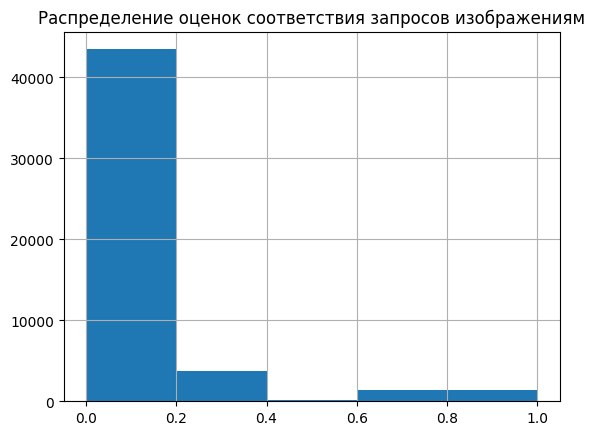

In [29]:
train_data['total_target'].hist(bins=5)
plt.title('Распределение оценок соответствия запросов изображениям');

Количество оценок ближе к нулю больше, чем оценок близких к единице

In [30]:
print((train_data.loc[train_data['total_target'] > 0.5, 
                      'total_target'].count() / len(train_data['total_target'])).round(3))

0.057


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 ОК, получен итоговый мастер-датафрейм признаки-таргет, с которым мы можем вести дальнейшую работу </div>

Доля оценок больше 0.5 составляет только 6 % от всей выборки. Фиксируем дисбаланс классов в оценках.

## Проверка данных

В некоторых странах, где работает ваша компания, действуют ограничения по обработке изображений: поисковым сервисам и сервисам, предоставляющим возможность поиска, запрещено без разрешения родителей или законных представителей предоставлять любую информацию, в том числе, но не исключительно тексты, изображения, видео и аудио, содержащие описание, изображение или запись голоса детей. Ребёнком считается любой человек, не достигший 16 лет.

В вашем сервисе строго следуют законам стран, в которых работают. Поэтому при попытке посмотреть изображения, запрещённые законодательством, вместо картинок показывается дисклеймер:

> This image is unavailable in your country in compliance with local laws
>

Однако у вас в PoC нет возможности воспользоваться данным функционалом. Поэтому все изображения, которые нарушают данный закон, нужно удалить из обучающей выборки.

In [31]:
print(f"Размер исходного датафрейма: {len(train_data)}")

Размер исходного датафрейма: 50159


In [32]:
stop_words = ['boy', 'girl', 'child', 'teenage', 'teenager', 'kid', 'baby']

blacklisted_images = set()

for i in range(len(train_data)):
    for word in stop_words:
        if word in train_data.loc[i, 'lem_query_text'].lower():
            file_name = train_data.loc[i, 'query_id'].split('#')[0]
            blacklisted_images.add(file_name)
            break 

print(f"Найдено запрещенных изображений: {len(blacklisted_images)}")

# Фильтруем датафрейм, удаляя все строки с запрещенными изображениями
train_data = train_data[
    ~train_data['query_id'].str.split('#').str[0].isin(blacklisted_images)
].copy()

print(f"Размер очищенного датафрейма: {len(train_data)}")

Найдено запрещенных изображений: 289
Размер очищенного датафрейма: 36008


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">

В этом разделе есть две проблемы: одна техническая (код не применен) и одна фундаментальная (неверная логика фильтрации).

**1. Техническая ошибка:**
Твой код работает вхолостую. Ты нашел индексы строк с запрещенными словами (`stop_words_indices`), но **не применил** этот фильтр к датафрейму. В следующей ячейке в `GroupShuffleSplit` уходит исходный, неочищенный `train_data`.

**2. Фундаментальная ошибка (Фильтрация строк vs Фильтрация картинок):**
Даже если ты применишь свой фильтр, ты удалишь только те строки, где **текст** содержит стоп-слова. Но юридическое ограничение касается **изображений**.
В нашем датасете пары "картинка-текст" собраны достаточно хаотично. Может случиться так, что у нас есть фото ребенка, но в данной конкретной строке оно имеет нейтральное описание (например, "Собака бежит"). Твой фильтр пропустит эту строку, и нейросеть обучится на фото ребенка.

**Как гарантированно удалить запрещенные фото (Смотрим на структуру датасета):**
Авторы датасета оставили подсказку в колонке `query_id`. Она имеет формат `<имя_файла_изображения>#<номер>`. Это означает, что данный текст был написан специально для этой картинки.
Если текст содержит слово "boy", значит, на картинке из `query_id` изображен мальчик. И эту картинку нужно удалить **целиком**, из всех пар в датасете.

**Алгоритм действий:**
1.  Найди строки, где `lem_query_text` содержит запрещенные слова.
2.  Для этих строк возьми значение `query_id` и "отрежь" от него хвост (всё после `#`), чтобы получить имя файла.
3.  Собери уникальный список этих "запрещенных файлов" (Blacklist).
4.  Удали из основного датасета `train_data` **все** строки, где `file_name` входит в этот Blacklist.

Только так мы будем уверены, что ни одно изображение ребенка не попадет в обучение, даже если оно встречается в паре с нейтральным текстом.
    
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b> Комментарий студента</b></font>
   
 Вроде поправил
   
</div>

In [33]:
gss = GroupShuffleSplit(n_splits=1, train_size=0.7, random_state=10101)

In [34]:
train_data = train_data.reset_index(drop=True)

train_index, valid_indices = next(
    gss.split(X=train_data.drop(['total_target'], axis=1), 
              y=train_data['total_target'], groups=train_data['file_name'])
)

X_train, X_valid, y_train, y_valid = (
    train_data.drop('total_target', axis=1).iloc[train_index],
    train_data.drop('total_target', axis=1).iloc[valid_indices],
    train_data['total_target'].iloc[train_index],
    train_data['total_target'].iloc[valid_indices]
)


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">


</div>

На данном этапе мы удалили из обучающей выборки все запросы, в которых присутствует упоминение детей и разделили данные на обучающую и валидационную выборку в пропорции 7:3.

## Векторизация изображений

Перейдём к векторизации изображений.

Самый примитивный способ — прочесть изображение и превратить полученную матрицу в вектор. Такой способ нам не подходит: длина векторов может быть сильно разной, так как размеры изображений разные. Поэтому стоит обратиться к свёрточным сетям: они позволяют "выделить" главные компоненты изображений. Как это сделать? Нужно выбрать какую-либо архитектуру, например ResNet-18, посмотреть на слои и исключить полносвязные слои, которые отвечают за конечное предсказание. При этом можно загрузить модель данной архитектуры, предварительно натренированную на датасете ImageNet.

In [35]:
resnet = models.resnet18(weights=None)

for param in resnet.parameters():
    param.requires_grad_(False)

modules = list(resnet.children())[:-1]
resnet = nn.Sequential(*modules)
resnet.eval()

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Con

In [36]:
norm = transforms.Normalize(
    mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    norm,
])

In [37]:
def image_to_vector(image_name, folder_path):
    img_path = os.path.join(folder_path, image_name)
    
    img = Image.open(img_path).convert('RGB')
    image_tensor = preprocess(img).unsqueeze(0)
    img_vector = resnet(image_tensor).flatten().numpy()
    
    return img_vector

def df_img_vectorizer(df, img_folder_name):
    # Исправлено: image_to_vector вместо img_to_vect
    df['img_vector'] = df['file_name'].apply(lambda x: image_to_vector(x, img_folder_name))
    
    return df

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
    
У тебя реализованы две функции: `img_to_vect` и `img_to_vect2`. Это архитектурная ошибка, и вот почему:

1.  **Функция не использует свои аргументы:**
    Посмотри внимательно на определение первой функции:

    ```python
    def img_to_vect(image_name, img_folder_name):
        # Ты используешь глобальную переменную path, а не аргумент img_folder_name!
        img = Image.open(path + '/' + image_name)...
    ```

    Ты передаешь `img_folder_name` при вызове, но внутри функции этот аргумент игнорируется. Функция "обманывает": она выглядит универсальной, но на самом деле жестко "прибита гвоздями" к глобальной переменной `path` (папка трейна).

2.  **Дублирование (нарушение DRY):**
    Именно из-за того, что первая функция не использует переданный путь, тебе пришлось создавать клона — `img_to_vect2`, который отличается только тем, что использует другую глобальную переменную (`path2`).
    Если ты захочешь поменять логику обработки (например, изменить размер ресайза), тебе придется править код в двух местах.

**Как исправить:**
Напиши **одну** честную функцию, которая реально использует переданный ей путь к папке.

```python
def get_image_vector(image_name, folder_path):
    # Используем folder_path, который передали в аргументах
    img_path = os.path.join(folder_path, image_name)
    
    img = Image.open(img_path).convert('RGB')
    # ... остальная логика ...
    return img_vector
```

Тогда ты сможешь использовать эту функцию и для трейна, и для теста, просто передавая разные пути. Удали дублирующийся код.   
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b> Комментарий студента</b></font>
   
 Поправил
   
</div>

In [38]:
%%time
df = df_img_vectorizer(df, '/kaggle/input/picture/')

CPU times: user 1min 34s, sys: 715 ms, total: 1min 35s
Wall time: 54.9 s


In [39]:
X_train = X_train.merge(df, on='file_name', how='left')

In [40]:
X_valid = X_valid.merge(df, on='file_name', how='left')

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 Отлично, вектра для изображений получены👍 </div>

На данном этапе мы сделали две функции:
1) Первая принимает имя файла изображения и путь до него, а на выходе выдает векторное представление данного изображения.
2) Вторая принимает датафрейм с именами файлов изображений в столбце file_name и имя папки с изображениями. После отдает нам тот же датафрейм, но с добаленным столбцом img_vector, в котором хранится информация о векторе изображения из первой функции

Также объединили датафрейм с обучающей и валидационной таблицей оценок

## Векторизация текстов

Следующий этап — векторизация текстов. Вы можете поэкспериментировать с несколькими способами векторизации текстов:

- tf-idf
- word2vec
- \*трансформеры (например Bert)

\* — если вы изучали трансформеры в спринте Машинное обучение для текстов.


In [41]:
tv = TfidfVectorizer()
tv.fit(X_train['lem_query_text'].drop_duplicates());

In [42]:
def text_to_vect(df):        
    text_features_array = tv.transform(df['lem_query_text']).toarray()    
    return text_features_array

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Вектора для текста получены с помощью TF-IDF
    
-----------
    
Что касается выбранного подхода. По моим наблюдения используя TfidfVectorizer крайне редко получается обучить толковую модель.  Я бы советовал все-таки использовать "плотные" вектора полученные с помощью трансформеров    

</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Подсвечу желтым, чтобы не потерялось.
    
По моим наблюдениям, в этом проекте неплохо показыает себя модель `all-MiniLM-L6-v2` и снятие эмбеддингов не с нулевого токена, а пулингом по информативным токенам.
    
Запустить её можно либо через transformers, либо через sentence-transformers    
    
https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2    
</div>

В рамках данного шага получили массив векторных представлений текстов

## Объединение векторов

Подготовьте данные для обучения: объедините векторы изображений и векторы текстов с целевой переменной.

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
    

Пропущен важный шаг — масштабирование признаков. Это не просто рекомендация, а почти обязательное действие, отсутствие которого напрямую повлиет на твои результат, например нейронная сеть может обучаться медленнее и нестабильнее, также возмжоны проблемы с обычными линейными моделями.

Однако просто взять обычный `StandardScaler` здесь было бы ошибкой. Этот инструмент отлично подходит для обычных табличных данных, но он может «испортить» эмбеддинги, так как работает *поколоночно* и разрушает внутреннюю геометрию векторов, в которой и заключен весь их смысл.

Самый правильный и современный подход для твоей задачи — это **раздельная L2-нормализация** векторов перед их объединением.

Вот как это выглядит на практике:
1.  **Сначала** ты берешь все векторы изображений (из `ResNet`) и нормализуешь их отдельно с помощью `Normalizer(norm='l2')`.
2.  **Потом** ты берешь все векторы текстов (из `BERT`) и тоже нормализуешь их отдельно, своим экземпляром `Normalizer`'а.
3.  И только **после этого** ты конкатенируешь уже нормализованные векторы в единую матрицу признаков.

Что это дает? Ты приводишь оба типа векторов к сопоставимому масштабу (все они становятся векторами единичной длины), но при этом полностью сохраняешь семантическую структуру внутри каждого из пространств (пространства картинок и пространства текстов). Это самый надежный способ подготовить такие сложные признаки для модели.
    

</div>

In [43]:
def make_features(df):
    
    img_array = np.array(df['img_vector'].values.tolist())
    
    tv_array = text_to_vect(df)
    
    features_array = np.concatenate((tv_array, img_array), axis=1)
    
    return features_array

In [44]:
train_features = make_features(X_train)

In [45]:
valid_features = make_features(X_valid)

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 Вектора, полученные из текста и изображения объеденены👍 </div>

Создали функцию, принимающую датафрейм и преобразует его в массив объединенных векторов изображений и текстов

## Обучение модели предсказания соответствия

Для обучения разделите датасет на тренировочную и тестовую выборки. Простое случайное разбиение не подходит: нужно исключить попадание изображения и в обучающую, и в тестовую выборки.
Для того чтобы учесть изображения при разбиении, можно воспользоваться классом [GroupShuffleSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GroupShuffleSplit.html) из библиотеки sklearn.model_selection.

Код ниже разбивает датасет на тренировочную и тестовую выборки в пропорции 7:3 так, что строки с одинаковым значением 'group_column' будут содержаться либо в тестовом, либо в тренировочном датасете.

```
from sklearn.model_selection import GroupShuffleSplit
gss = GroupShuffleSplit(n_splits=1, train_size=.7, random_state=42)
train_indices, test_indices = next(gss.split(X=df.drop(columns=['target']), y=df['target'], groups=df['group_column']))
train_df, test_df = df.loc[train_indices], df.loc[test_indices]

```

Какую модель использовать — выберите самостоятельно. Также вам предстоит выбрать метрику качества либо реализовать свою.

Обучим две модели: LinearRegression и полносвязную нейронную сеть. 

В качестве метрики будем использовать MSE.

In [46]:
model_lr = LinearRegression()
model_lr.fit(train_features, y_train);

In [47]:
model_lr_preds = model_lr.predict(valid_features)
print(mean_squared_error(y_valid, model_lr_preds))

0.05512063500191133


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

Показатель MSE модели LinearRegression составляет - 0.047

In [48]:
%%time
best_metric = 1000
for i in range(50, 151, 100):
    for j in range(20, 51, 30):
        for k in range(5, 11, 5):
            
            units_4 = [i, j, k, 1]
            input_dim = train_features.shape[1]
            
            dense_model = keras.models.Sequential()
            dense_model.add(keras.layers.Dense(units=units_4[0], input_dim=input_dim, activation='relu'))
            dense_model.add(Dense(units=units_4[1], input_dim=units_4[0], activation='relu'))
            dense_model.add(Dense(units=units_4[2], input_dim=units_4[1], activation='relu'))
            dense_model.add(Dense(units=units_4[3], input_dim=units_4[2], activation='sigmoid'))

            dense_model.compile(loss='mean_squared_error', optimizer='Adam', metrics=['mean_squared_error'])
            
            dense_model.fit(train_features, y_train, epochs=100,validation_data=(valid_features, y_valid))
            
            metric = mean_squared_error(y_valid, dense_model.predict(valid_features))
            
            if metric < best_metric:
                best_metric = metric
                best_units = [i, j, k]
                best_dense_model = dense_model

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-11-29 19:21:59.243463: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/100
787/787 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0523 - mean_squared_error: 0.0523 - val_loss: 0.0479 - val_mean_squared_error: 0.0479
Epoch 2/100
787/787 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0470 - mean_squared_error: 0.0470 - val_loss: 0.0476 - val_mean_squared_error: 0.0476
Epoch 3/100
787/787 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0464 - mean_squared_error: 0.0464 - val_loss: 0.0469 - val_mean_squared_error: 0.0469
Epoch 4/100
787/787 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0473 - mean_squared_error: 0.0473 - val_loss: 0.0476 - val_mean_squared_error: 0.0476
Epoch 5/100
787/787 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0458 - mean_squared_error: 0.0458 - val_loss: 0.0462 - val_mean_squared_error: 0.0462
Epoch 6/100
787/787 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0454 - mean_squared_error: 0.0454 - val_loss: 0.0461 - val_mean_squared_error: 0.0461
Epoch 7/100
787/787 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0429 - mean_squared_error: 0.0429 - val_los

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


787/787 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0522 - mean_squared_error: 0.0522 - val_loss: 0.0479 - val_mean_squared_error: 0.0479
Epoch 2/100
787/787 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0494 - mean_squared_error: 0.0494 - val_loss: 0.0475 - val_mean_squared_error: 0.0475
Epoch 3/100
787/787 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0458 - mean_squared_error: 0.0458 - val_loss: 0.0473 - val_mean_squared_error: 0.0473
Epoch 4/100
787/787 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0461 - mean_squared_error: 0.0461 - val_loss: 0.0466 - val_mean_squared_error: 0.0466
Epoch 5/100
787/787 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0460 - mean_squared_error: 0.0460 - val_loss: 0.0463 - val_mean_squared_error: 0.0463
Epoch 6/100
787/787 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0458 - mean_squared_error: 0.0458 - val_loss: 0.0459 - val_mean_squared_error: 0.0459
Epoch 7/100
787/787 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0455 - mean_squared_error: 0.0455 - val_loss: 0.0458 - 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


787/787 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.1891 - mean_squared_error: 0.1891 - val_loss: 0.1117 - val_mean_squared_error: 0.1117
Epoch 2/100
787/787 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0982 - mean_squared_error: 0.0982 - val_loss: 0.0719 - val_mean_squared_error: 0.0719
Epoch 3/100
787/787 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0669 - mean_squared_error: 0.0669 - val_loss: 0.0575 - val_mean_squared_error: 0.0575
Epoch 4/100
787/787 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0539 - mean_squared_error: 0.0539 - val_loss: 0.0519 - val_mean_squared_error: 0.0519
Epoch 5/100
787/787 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0507 - mean_squared_error: 0.0507 - val_loss: 0.0496 - val_mean_squared_error: 0.0496
Epoch 6/100
787/787 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0488 - mean_squared_error: 0.0488 - val_loss: 0.0487 - val_mean_squared_error: 0.0487
Epoch 7/100
787/787 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0466 - mean_squared_error: 0.0466 - val_loss: 0.0483 - 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
787/787 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0507 - mean_squared_error: 0.0507 - val_loss: 0.0480 - val_mean_squared_error: 0.0480
Epoch 2/100
787/787 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0473 - mean_squared_error: 0.0473 - val_loss: 0.0488 - val_mean_squared_error: 0.0488
Epoch 3/100
787/787 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0459 - mean_squared_error: 0.0459 - val_loss: 0.0470 - val_mean_squared_error: 0.0470
Epoch 4/100
787/787 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0470 - mean_squared_error: 0.0470 - val_loss: 0.0475 - val_mean_squared_error: 0.0475
Epoch 5/100
787/787 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0479 - mean_squared_error: 0.0479 - val_loss: 0.0462 - val_mean_squared_error: 0.0462
Epoch 6/100
787/787 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0459 - mean_squared_error: 0.0459 - val_loss: 0.0461 - val_mean_squared_error: 0.0461
Epoch 7/100
787/787 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0452 - mean_squared_error: 0.0452 - val_los

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


787/787 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0528 - mean_squared_error: 0.0528 - val_loss: 0.0499 - val_mean_squared_error: 0.0499
Epoch 2/100
787/787 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0455 - mean_squared_error: 0.0455 - val_loss: 0.0481 - val_mean_squared_error: 0.0481
Epoch 3/100
787/787 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0472 - mean_squared_error: 0.0472 - val_loss: 0.0487 - val_mean_squared_error: 0.0487
Epoch 4/100
787/787 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0473 - mean_squared_error: 0.0473 - val_loss: 0.0470 - val_mean_squared_error: 0.0470
Epoch 5/100
787/787 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0456 - mean_squared_error: 0.0456 - val_loss: 0.0466 - val_mean_squared_error: 0.0466
Epoch 6/100
787/787 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0463 - mean_squared_error: 0.0463 - val_loss: 0.0461 - val_mean_squared_error: 0.0461
Epoch 7/100
787/787 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0445 - mean_squared_error: 0.0445 - val_loss: 0.0458 - 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


787/787 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0550 - mean_squared_error: 0.0550 - val_loss: 0.0481 - val_mean_squared_error: 0.0481
Epoch 2/100
787/787 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0477 - mean_squared_error: 0.0477 - val_loss: 0.0473 - val_mean_squared_error: 0.0473
Epoch 3/100
787/787 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0475 - mean_squared_error: 0.0475 - val_loss: 0.0480 - val_mean_squared_error: 0.0480
Epoch 4/100
787/787 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0489 - mean_squared_error: 0.0489 - val_loss: 0.0470 - val_mean_squared_error: 0.0470
Epoch 5/100
787/787 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0481 - mean_squared_error: 0.0481 - val_loss: 0.0480 - val_mean_squared_error: 0.0480
Epoch 6/100
787/787 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0451 - mean_squared_error: 0.0451 - val_loss: 0.0459 - val_mean_squared_error: 0.0459
Epoch 7/100
787/787 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0457 - mean_squared_error: 0.0457 - val_loss: 0.0473 - 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
787/787 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0544 - mean_squared_error: 0.0544 - val_loss: 0.0553 - val_mean_squared_error: 0.0553
Epoch 2/100
787/787 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0540 - mean_squared_error: 0.0540 - val_loss: 0.0553 - val_mean_squared_error: 0.0553
Epoch 3/100
787/787 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0539 - mean_squared_error: 0.0539 - val_loss: 0.0553 - val_mean_squared_error: 0.0553
Epoch 4/100
787/787 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0569 - mean_squared_error: 0.0569 - val_loss: 0.0553 - val_mean_squared_error: 0.0553
Epoch 5/100
787/787 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0547 - mean_squared_error: 0.0547 - val_loss: 0.0553 - val_mean_squared_error: 0.0553
Epoch 6/100
787/787 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0551 - mean_squared_error: 0.0551 - val_loss: 0.0553 - val_mean_squared_error: 0.0553
Epoch 7/100
787/787 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0546 - mean_squared_error: 0.0546 - val_los

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
787/787 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0607 - mean_squared_error: 0.0607 - val_loss: 0.0489 - val_mean_squared_error: 0.0489
Epoch 2/100
787/787 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0487 - mean_squared_error: 0.0487 - val_loss: 0.0483 - val_mean_squared_error: 0.0483
Epoch 3/100
787/787 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0485 - mean_squared_error: 0.0485 - val_loss: 0.0468 - val_mean_squared_error: 0.0468
Epoch 4/100
787/787 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0463 - mean_squared_error: 0.0463 - val_loss: 0.0487 - val_mean_squared_error: 0.0487
Epoch 5/100
787/787 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0460 - mean_squared_error: 0.0460 - val_loss: 0.0460 - val_mean_squared_error: 0.0460
Epoch 6/100
787/787 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0466 - mean_squared_error: 0.0466 - val_loss: 0.0478 - val_mean_squared_error: 0.0478
Epoch 7/100
787/787 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0466 - mean_squared_error: 0.0466 - val_los

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Возможно ты воспринимаешь "количество эпох" как гиперпараметр "спущеный с верху". Т.е. устанавливаем параметры сети, запускаем обучение и смотрим на результат.
    
В случае с нейронками логика ипользования немного отличается от того, к чему мы привыкли в классических моделях. Здесь лучше работать по другой логике:
    
 - оределилили архитектуру, создали модель
 - начинаем её учить. и учим пока метрика на валидационной выборке улучшается.  Наблюдая в динамике метрики на обучающей и валидационной выборках.
 - если вдруг метрика на обучающей выборке перестала снижаться, можно попробовать уменьшить шаг обучения (например в 10 раз) и продолжить обучение модели.
    
В любом случае полезно обучать модель пока метрика на валидации улучшается. Наша цель - оптимальное состояние модели, при котором модель хорошо находит законмоерности в данных, но еще не переобучилась.
        
После того, как закончили обучение смотрим на логи, анализируем, чего модели не хватило, меняем архитектуру и запускаем обучение по новой.    
    

    

    
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">


Для осознанной настройки нейронки важно понимать, как менять её архитектуру (усложнять и уменьшать регуляризацию? уменьшать шаг обучения? усиливать регуляризацию?). Для того чтобы принять эти  решения мало видеть только конечную цифру, важно понимать, чего модели не хватает чтобы метрика стала лучше.
    
    
Вот типичные  проблемы, которые можно выявить  анализируя графики и пути их решения:

<b>Недообучение (Underfitting)</b>
  Признаки: Высокие значения потерь и низкая точность как на обучающей, так и на валидационной выборке. Графики потерь не снижаются (или снижаются  недостаточно).
  
  Решения:
    
 - Увеличение сложности модели (добавление слоев, увеличение числа нейронов).
 - Использование более сложных моделей, таких как более глубокие нейронные сети.
 - Увеличение количества эпох обучения.

<b>Переобучение (Overfitting)</b>
  Признаки: Значительное снижение потерь и увеличение точности на обучающей выборке, но высокие потери и низкая точность на валидационной выборке. Графики начинают расходиться после некоторого количества эпох.
    
 Решения:
  - Регуляризация (L1, L2 регуляризация).
  - Dropout (добавление Dropout слоев).
  - Уменьшение сложности модели (уменьшение числа слоев или нейронов).
  - Использование аугментации данных для увеличения разнообразия данных.
  - Раннее завершение обучения (Early Stopping) на основе валидационной ошибки.

<b>Плохой выбор гиперпараметров</b>
 Признаки: Нестабильные графики потерь и точности (большие колебания).
 
 Решения:
  - Настройка скорости обучения (learning rate).
  - Оптимизация размера батча (batch size).
  - Попробовать другие оптимизаторы (например, Adam, SGD с различными параметрами).    

</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">

Я вижу, что ты реализовал ручной перебор количества нейронов через вложенные циклы `for`.
Давай обсудим, почему такой подход (Grid Search по количеству нейронов с шагом 50) — это не совсем то, что нужно.

**1. Нейросеть — не "черный ящик", а универсальный аппроксиматор.**
Подбирать количество нейронов с точностью до десятка (например, 100 или 150) обычно бессмысленно. Емкость сети от этого меняется слабо.
* **Совет:** Зафиксируй базовую архитектуру (например, классическую "воронку": `512 -> 128 -> 1`). Если хочешь экспериментировать с размером, меняй его кратно (в 2 раза больше / в 2 раза меньше), чтобы увидеть реальную разницу.

**2. Что действительно стоит перебирать (влияние на обучение):**
Вместо количества нейронов лучше сосредоточиться на параметрах, которые управляют **динамикой** обучения:
* **Learning Rate (Шаг обучения):** Это самый важный гиперпараметр. Попробуй `1e-3`, `1e-4`.  Если шаг велик, модель может не учиться, если наоборот слишком мал - модель будет учиться вечтность.
* **Batch Size:** Как размер пакета влияет на стабильность градиента? Как правило размер батча стараются делать максимально большим, кратным степени двойки (сколько прогоняется через модель без появления ошибки нехватки памяти)
* **Регуляризация:** Добавь `Dropout` (например, 0.2 или 0.5) и смотри, как это влияет на переобучение.

**3. "Ручное" обучение vs AutoML:**
Сейчас ты запустил циклы и ждешь результата. Но для начинающего специалиста гораздо полезнее "помучить" сеть руками:
* Запусти обучение с выводом графика лоссов в реальном времени.
* Смотри, как падают кривые Train и Val.
* Если валидация пошла вверх — значит, переобучение (нужен Dropout или Early Stopping).
* Если лосс скачет — уменьши Learning Rate.

Именно так нарабатывается интуиция. А автоматический перебор (через `Optuna` или `Keras Tuner`) стоит подключать, когда ты уже понимаешь природу поведения твоей модели и реализовал **Early Stopping** (чтобы не ждать 100 эпох, если сеть уже сошлась или умерла).
</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">

Давай докрутим твою нейросеть, чтобы она работала как современный инструмент, а не как учебный пример из 2010 года.

**1. Проблема связки Sigmoid + MSE:**
Ты используешь активацию `sigmoid` на выходе и лосс `mean_squared_error`.
Математически это **плохая комбинация**.
* **Почему:** У сигмоиды очень маленькая производная на краях (когда предсказание близко к 0 или 1). В сочетании с MSE это приводит к проблеме **затухания градиентов** (vanishing gradients). Сеть учится очень медленно, даже если она сильно ошибается.
* **Решение:** Если твой таргет — это вероятность/доля (от 0 до 1), используй функцию потерь **`BinaryCrossentropy`**. Она создана специально для работы с сигмоидой и "наказывает" модель гораздо эффективнее. Или убери сигмоиду и оставь один лосс MSE.

**2. Batch Normalization:**
Сейчас твоя сеть — это просто стопка полносвязных слоев. Добавь слои `BatchNormalization` (обычно ставятся после `Dense`, но перед функцией активации).
* Это стабилизирует обучение.
* Позволяет выставить `learning_rate` побольше.
* Сеть сходится в разы быстрее.

**3. Гиперпараметры (Что крутить вместо количества нейронов):**
* **Batch Size:** Векторные данные занимают мало памяти. Стандартные 32 семпла — это мало. Попробуй увеличить батч до **128, 256 или 512**. Это ускорит эпоху и сделает оценку градиента точнее.
* **Learning Rate (Шаг обучения):** Это "педаль газа" твоей нейросети. Дефолтное значение в Adam ($0.001$) не всегда идеально. Попробуй перебрать значения ($1e-2, 1e-3, 1e-4$). Это влияет на результат сильнее, чем добавление лишних 50 нейронов.
* **Dropout:**  Параметр p, отвечающий за регуляризацию как раз позволяет нам искать баланс между "модель слишком умная и быстро переобучилась" и "модель слишком тупая и не может найти закономерности в данных.   Нам важно найти такое промежуточное положение, при котором модель будет хорошо работать на валидационных данных.
    
    
</div>

In [49]:
print(best_metric)
print(best_units)

0.04562876456382523
[150, 50, 10]


Показатель MSE модели составляет - 0.04

В рамках данного шага обучили две модели: <br>
LinearRegression с показателем MSE - 0.057 <br>
Полносвязную нейроную сеть с показателем MSE - 0.045 <br>
До тестирования допустим сразу две модели.


## Тестирование модели

Настало время протестировать модель. Для этого получите эмбеддинги для всех тестовых изображений из папки `test_images`, выберите случайные 10 запросов из файла `test_queries.csv` и для каждого запроса выведите наиболее релевантное изображение. Сравните визуально качество поиска.

In [50]:
%%time
test_images = df_img_vectorizer(test_images, '/kaggle/input/dfffff/test_images/')

CPU times: user 9.69 s, sys: 42.2 ms, total: 9.73 s
Wall time: 5.83 s


In [51]:
df_test = test_images

In [52]:
def eval_query_nn(query_text):
    lemm_text = " ".join([token.lemma_ for token in nlp(query_text)])
    stop = 0
    for word in stop_words:
        if word in lemm_text:
            stop = 1            
            break       
    
    if stop == 0:
        df_test['lem_query_text'] = lemm_text
        test_features = make_features(df_test)
        test_preds = best_dense_model.predict(test_features)
        img_index = np.argsort(test_preds.ravel())[::-1][0]
        display(Image.open('/kaggle/input/dfffff/test_images/' + test_images.loc[img_index, 
                                                                      'file_name']).convert('RGB'))
        print(query_text)
        print(round(test_preds.ravel()[img_index], 3))
    
    else:
        result = print('This image is unavailable in your country in compliance with local laws.') 

In [53]:
def eval_query_model_lr(query_text):
    lemm_text = " ".join([token.lemma_ for token in nlp(query_text)])
    stop = 0
    for word in stop_words:
        if word in lemm_text:
            stop = 1            
            break       
    
    if stop == 0:
        df_test['lem_query_text'] = lemm_text
        test_features = make_features(df_test)
        test_preds = model_lr.predict(test_features)
        img_index = np.argsort(test_preds.ravel())[::-1][0]
        display(Image.open('/kaggle/input/dfffff/test_images/' + test_images.loc[img_index, 
                                                                      'file_name']).convert('RGB'))
        print(query_text)
        print(round(test_preds.ravel()[img_index], 3))
    
    else:
        result = print('This image is unavailable in your country in compliance with local laws.')

Проведем тестирование нейронной сети

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


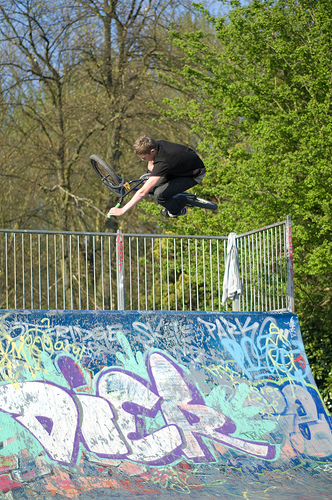

Two dogs walking with their toys .
0.074
None
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


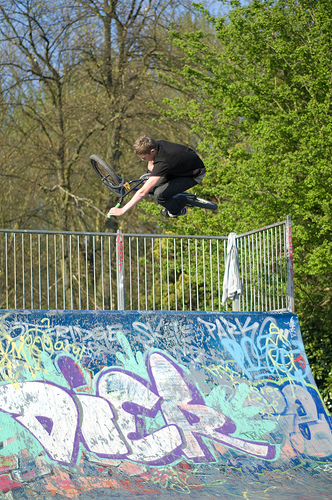

A small white dog is carrying something blue in its mouth and a bigger brown and black dog is carrying something orange in its mouth .
0.106
None
This image is unavailable in your country in compliance with local laws.
None
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


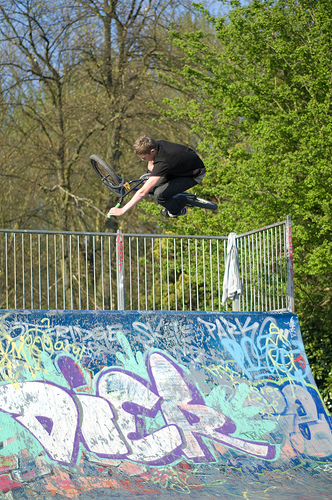

Several dogs are running down a cement and dirt path , with two brown ones in the lead .
0.079
None
This image is unavailable in your country in compliance with local laws.
None
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


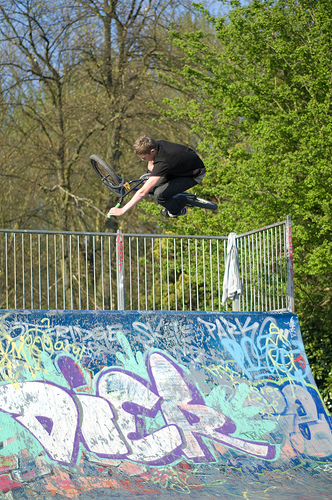

An older dark haired woman is taking a picture
0.172
None
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


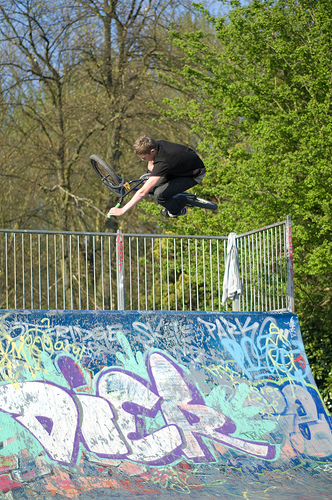

The dog is sitting on the side of the hill .
0.206
None
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


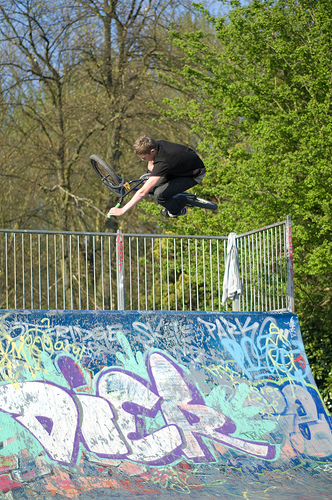

A shirtless man wearing a vest walks on a stage with his arms up .
0.067
None
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


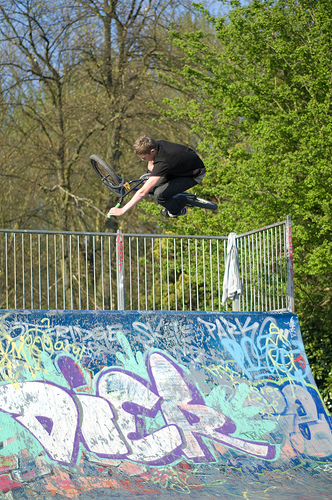

A man wearing a backpack looking to the side .
0.168
None
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


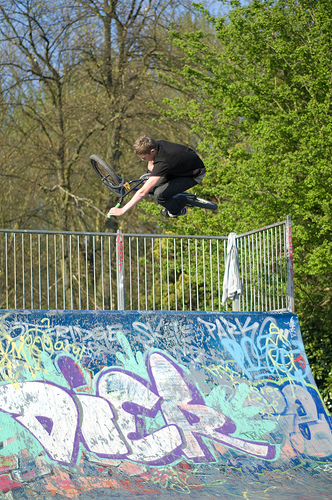

The black dog has a toy in its mouth and a person stands nearby .
0.139
None


In [54]:
for i in range(10):
    print(eval_query_nn(test_queries.loc[randrange(len(test_queries['query_text'])), 'query_text']))

Проведем тестирование модели линейной регрессии

This image is unavailable in your country in compliance with local laws.
None
This image is unavailable in your country in compliance with local laws.
None
This image is unavailable in your country in compliance with local laws.
None
This image is unavailable in your country in compliance with local laws.
None


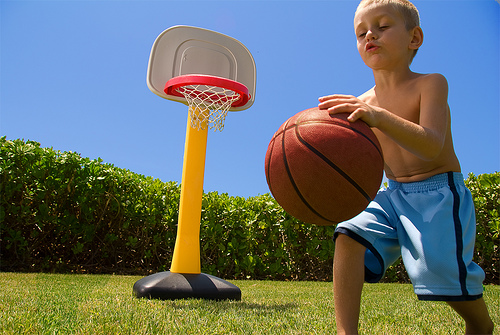

A red high speed racing boat skips across the water .
1585420399.775
None


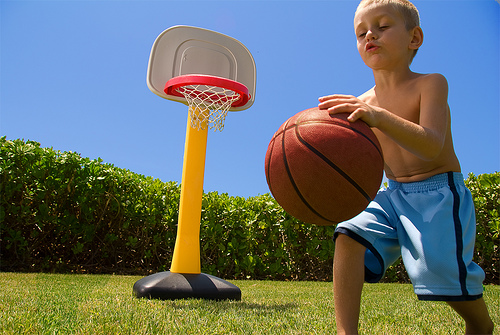

A bird flying over the water .
-345824658.879
None


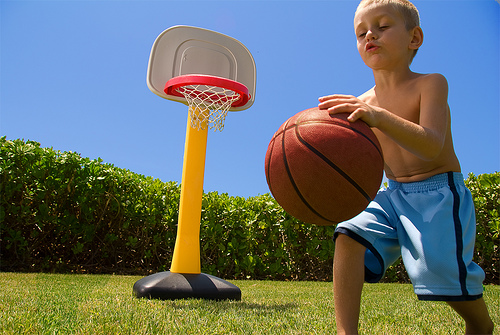

The man is on a black and white bike .
658649990.461
None


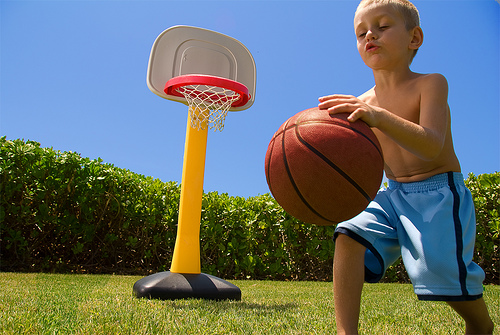

A black man in a blue shirt stands next to a black man in a red robe .
53342562.493
None
This image is unavailable in your country in compliance with local laws.
None


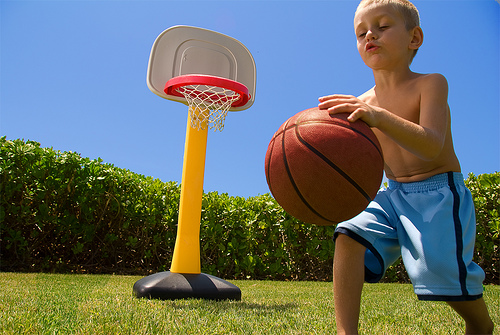

A man playing tennis looks very happy .
1237409767.977
None


In [55]:
for i in range(10):
    print(eval_query_model_lr(test_queries.loc[randrange(len(test_queries['query_text'])), 'query_text']))

Обе модели плохо предсказывают картинку по тексту. Модели выдают одну картинку на все запросы.

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Функции написаны и со своей задачей справляются. Принимают на вход текст и находят изображение. Отрабатывают контроль "запрещенного контента".

Да, ты прав, к сожалению работают они не очень. Причин несколько
    

 - вектора полученные с помощью tf-idf более низкого качества, как правило лучший резульат получается при использовании эмбеддингов, полученных с помощью BERT
 - использованы очень слабые модели. И нейронка без регуляризации могла банально переобучиться. Или найти 
    
----------------
    
Как правило хороший результат в этом проекте удается достичь при выполнении следующих условий
    
 - использование экспертных оценок   
 - векторизация изображений через pytorch, как есть в теории к спринту  (но с отрезанием только одного слоя)
 - эмбеддинги через bert (лучший результат дает модель  `all-MiniLM-L6-v2`)
 - раздельная l2 нормализация эмбеддингов       
 - упорное обучение нейронки (иногда тысячи эпох, в любом случае пока лосс снижается) с тщательным подбором гиперпараметров.   
    
</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Идеи и альтернативные подходы</b>
  Если хочешь получить хорошо работающее решение без обучения, то можешь провести эксперимент с нейронной сетью CLIP от OPEN AI (это не обязательно, только если хочешь добиться хороших результатов в этом проекте).

  Про эту нейронку много где написано, но можешь посмотреть например вот здесь  https://habr.com/ru/post/539312/.

  А для написания  реализации наиболее удобной лично для меня оказалась библиотека sbert. https://www.sbert.net/examples/applications/image-search/README.html  
    
    
<hr>    
    
Также неплохо работает следующий подход без предобученных моделей (к тому же легко реализуемый).
    
    
Вместо того, чтобы подавать на вход модели изображение + текст и получать меру соответствия, поступаем по другому. 
    
На вход модели подаем вектор описания, а на выходе учимся предсказывать вектор изображения. 
    
По поводу метрик тут ситуация следующая. Точно работает следующий подход
    
  - берем метрику mse, но тогда нужно чтобы модель её уменьшала. А значит в обучении используем только пары заведомо сответствующие друг другу

Можно попробовать использовать косинусное расстояние, она позволяет использовать все данные (если есть соответствие то выдает 1, если нет то 0). 
    
Также можно попробовать усложнить модель, например и изображения и тексты отправлять в пространство размерностью 256 и уже в этом пространстве учиться их "сближать".
    
По поводу методов векторизации: я бы использовать resnet18 для изображений (размерность эмбеддинга избражения 512) и БЕРТ для текстов (768). 
    
   
</div>

**Вывод:**

Мы провели мероприятия по обучению моделей с целью определения соответствия текстового запроса и изображения. <br>
 <br>
В рамках первого шага: <br>
Оформили цель и описание проекта. <br>
 <br>
В рамках второго шага: <br>
Загрузили и провели анализ загружаемых данных. <br>
 <br>
В рамках третьего шага: <br>
Удалили из обучающей выборки все запросы, в которых присутствует упоминение детей и разделили данные на обучающую и валидационную выборку в пропорции 7:3. <br>
 <br>
В рамках четвертого шага: <br>
Сделали две функции: <br>
1) Первая принимает имя файла изображения и путь до него, а на выходе выдает векторное представление данного изображения. <br>
2) Вторая принимает датафрейм с именами файлов изображений в столбце file_name и имя папки с изображениями. После отдает нам тот же датафрейм, но с добаленным столбцом img_vector, в котором хранится информация о векторе изображения из первой функции <br>
<br>
Также объединили датафрейм с обучающей и валидационной таблицей оценок<br>
<br>
В рамках пятого шага:<br>
Получили массив векторных представлений текстов<br>
<br>
В рамках шестого шага:<br>
Создали функцию, принимающую датафрейм и преобразует его в массив объединенных векторов изображений и текстов<br>
<br>
В рамках седьмого шага:<br>
Обучили две модели: <br>
LinearRegression с показателем MSE - 0.057 <br>
Полносвязную нейроную сеть с показателем MSE - 0.045 <br>
До тестирования допустим сразу две модели. <br>
 <br>
В рамках восьмого шага: <br>
Провели тестирование. Обе модели плохо предсказывают картинку по тексту. Модели выдают одну картинку на все запросы. <br>

## Выводы

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Исследовательский анализ данных выполнен
- [ ]  Проверены экспертные оценки и краудсорсинговые оценки
- [ ]  Из датасета исключены те объекты, которые выходят за рамки юридических ограничений
- [ ]  Изображения векторизованы
- [ ]  Текстовые запросы векторизованы
- [ ]  Данные корректно разбиты на тренировочную и тестовую выборки
- [ ]  Предложена метрика качества работы модели
- [ ]  Предложена модель схожести изображений и текстового запроса
- [ ]  Модель обучена
- [ ]  По итогам обучения модели сделаны выводы
- [ ]  Проведено тестирование работы модели
- [ ]  По итогам тестирования визуально сравнили качество поиска

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Заключительный комментарий</b>

Подведем итоги. Я вижу, что в целом с проектом ты справляешься.
    
Проведено исследование и предобработка данных. Выполнена векторизация изображений и текстовых описаний. Обучены модели для предсказания степени соответствия, а также написана функция для инференса и с её помощью проведено тестирование.
 
    
Пожалуйста исправь все критичные ошибки, которые я подсветил красными комментариями.
    
Желтые комментарии на твое усмотрение. Но учитывая что наш подход "не взлетел" и нужно хоть что-то показать заказчику, попробуй показать возможный инференс с помщью CLIP. С библиотекой sentence-transformers это делается буквально в 10 строк. Важно: мы делаем CLIP не вместо своего решения, а как дополнение.
Жду твою работу на повторное ревью.
</div>